1. Data Cleaning and Preparation

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Cardiotocographic.csv")

# Preview the data
df.head()

# Check basic info
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handling missing values (example: fill with median or drop)
df = df.fillna(df.median())

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

# Ensure numeric columns are properly formatted
numeric_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Detect outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("Outliers detected per column:\n", outliers.sum())

# Remove outliers
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP

2. Statistical Summary

In [5]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Additional metrics
median_values = df.median()
iqr_values = IQR
print("Median values:\n", median_values)
print("IQR values:\n", iqr_values)


                LB           AC           FM           UC           DL  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean    132.864028     0.003692     0.000638     0.004792     0.001425   
std       9.772375     0.003711     0.001380     0.002778     0.002164   
min     106.000000    -0.000185    -0.002467    -0.000101    -0.000124   
25%     125.000000     0.000000     0.000000     0.002864     0.000000   
50%     133.000000     0.002685     0.000000     0.004938     0.000000   
75%     140.000000     0.006365     0.000819     0.006831     0.002650   
max     160.000000     0.014024     0.006272     0.012072     0.008197   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  1055.0  1055.0  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.0     0.0    44.053047     1.215652     4.037093     8.633697   
std       0.0     0.0    15.603371     0.558825     6.777756     4.325211   
min       0.0     0.0    

3. Data Visualization

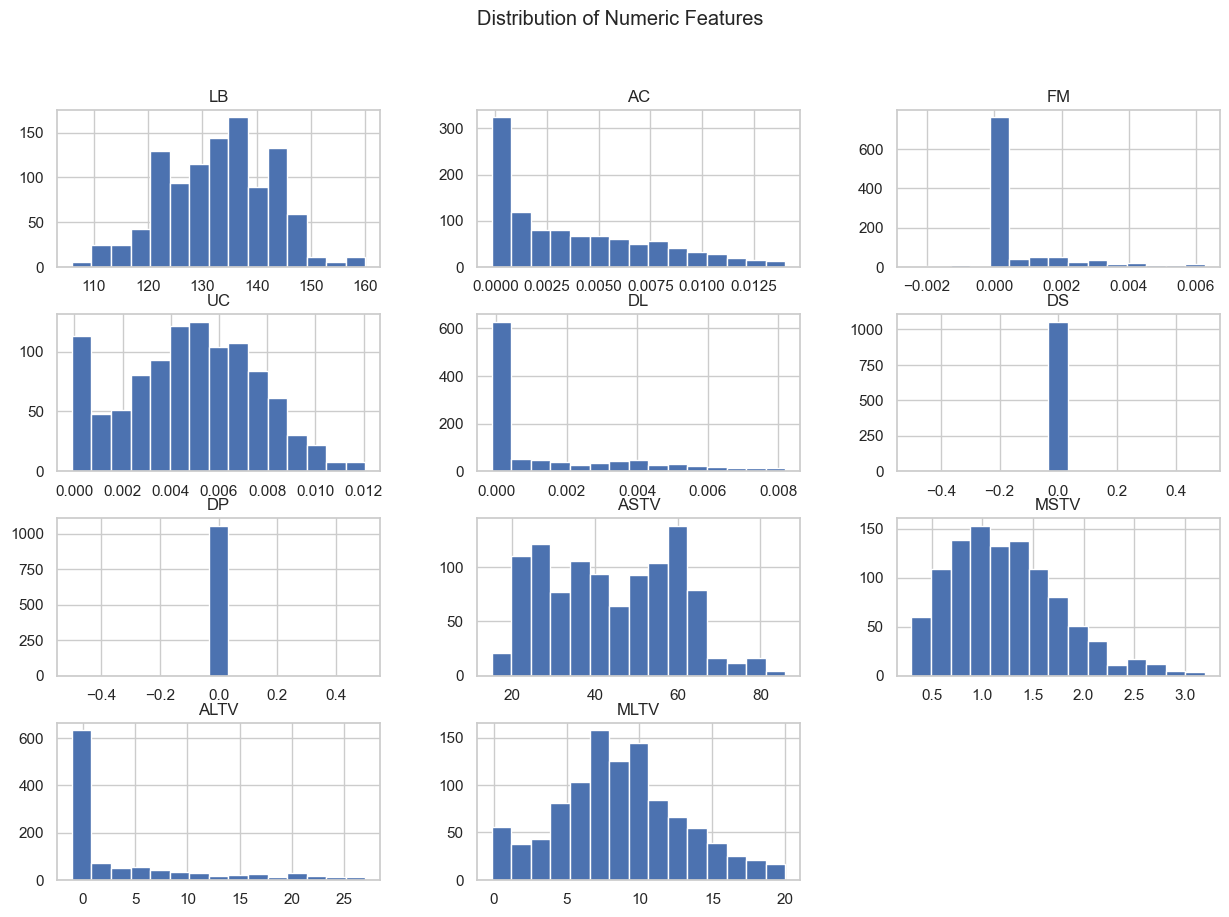

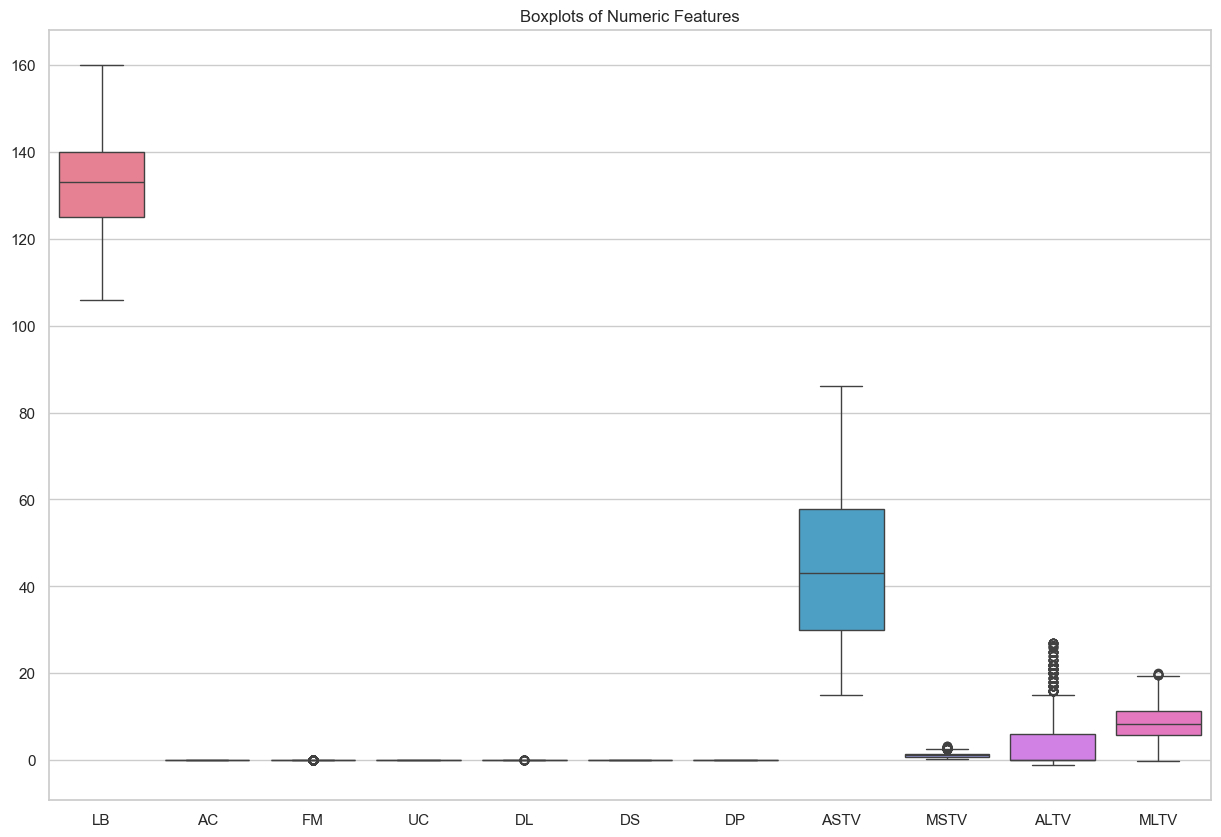

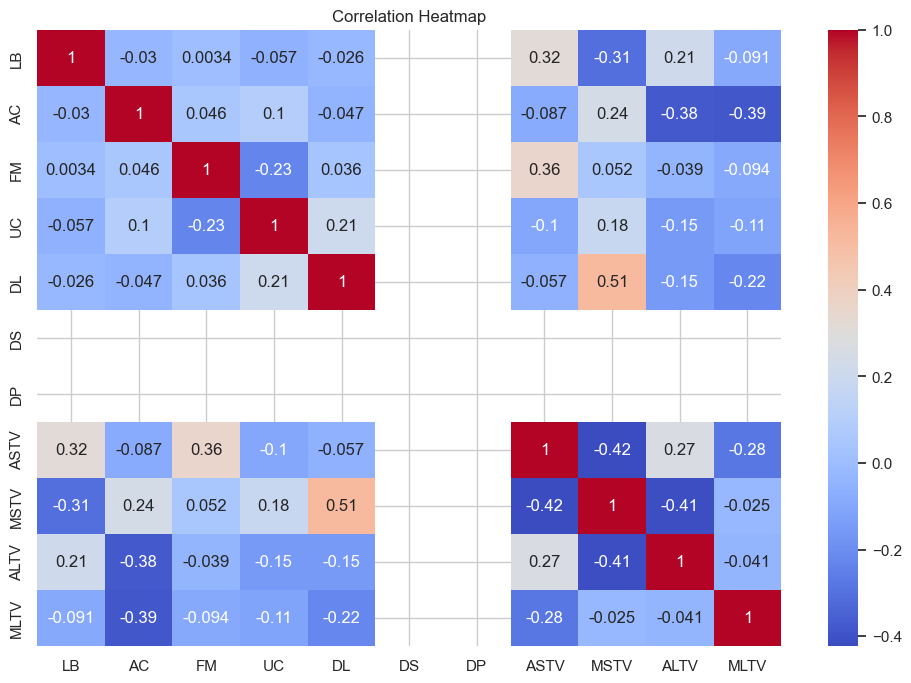

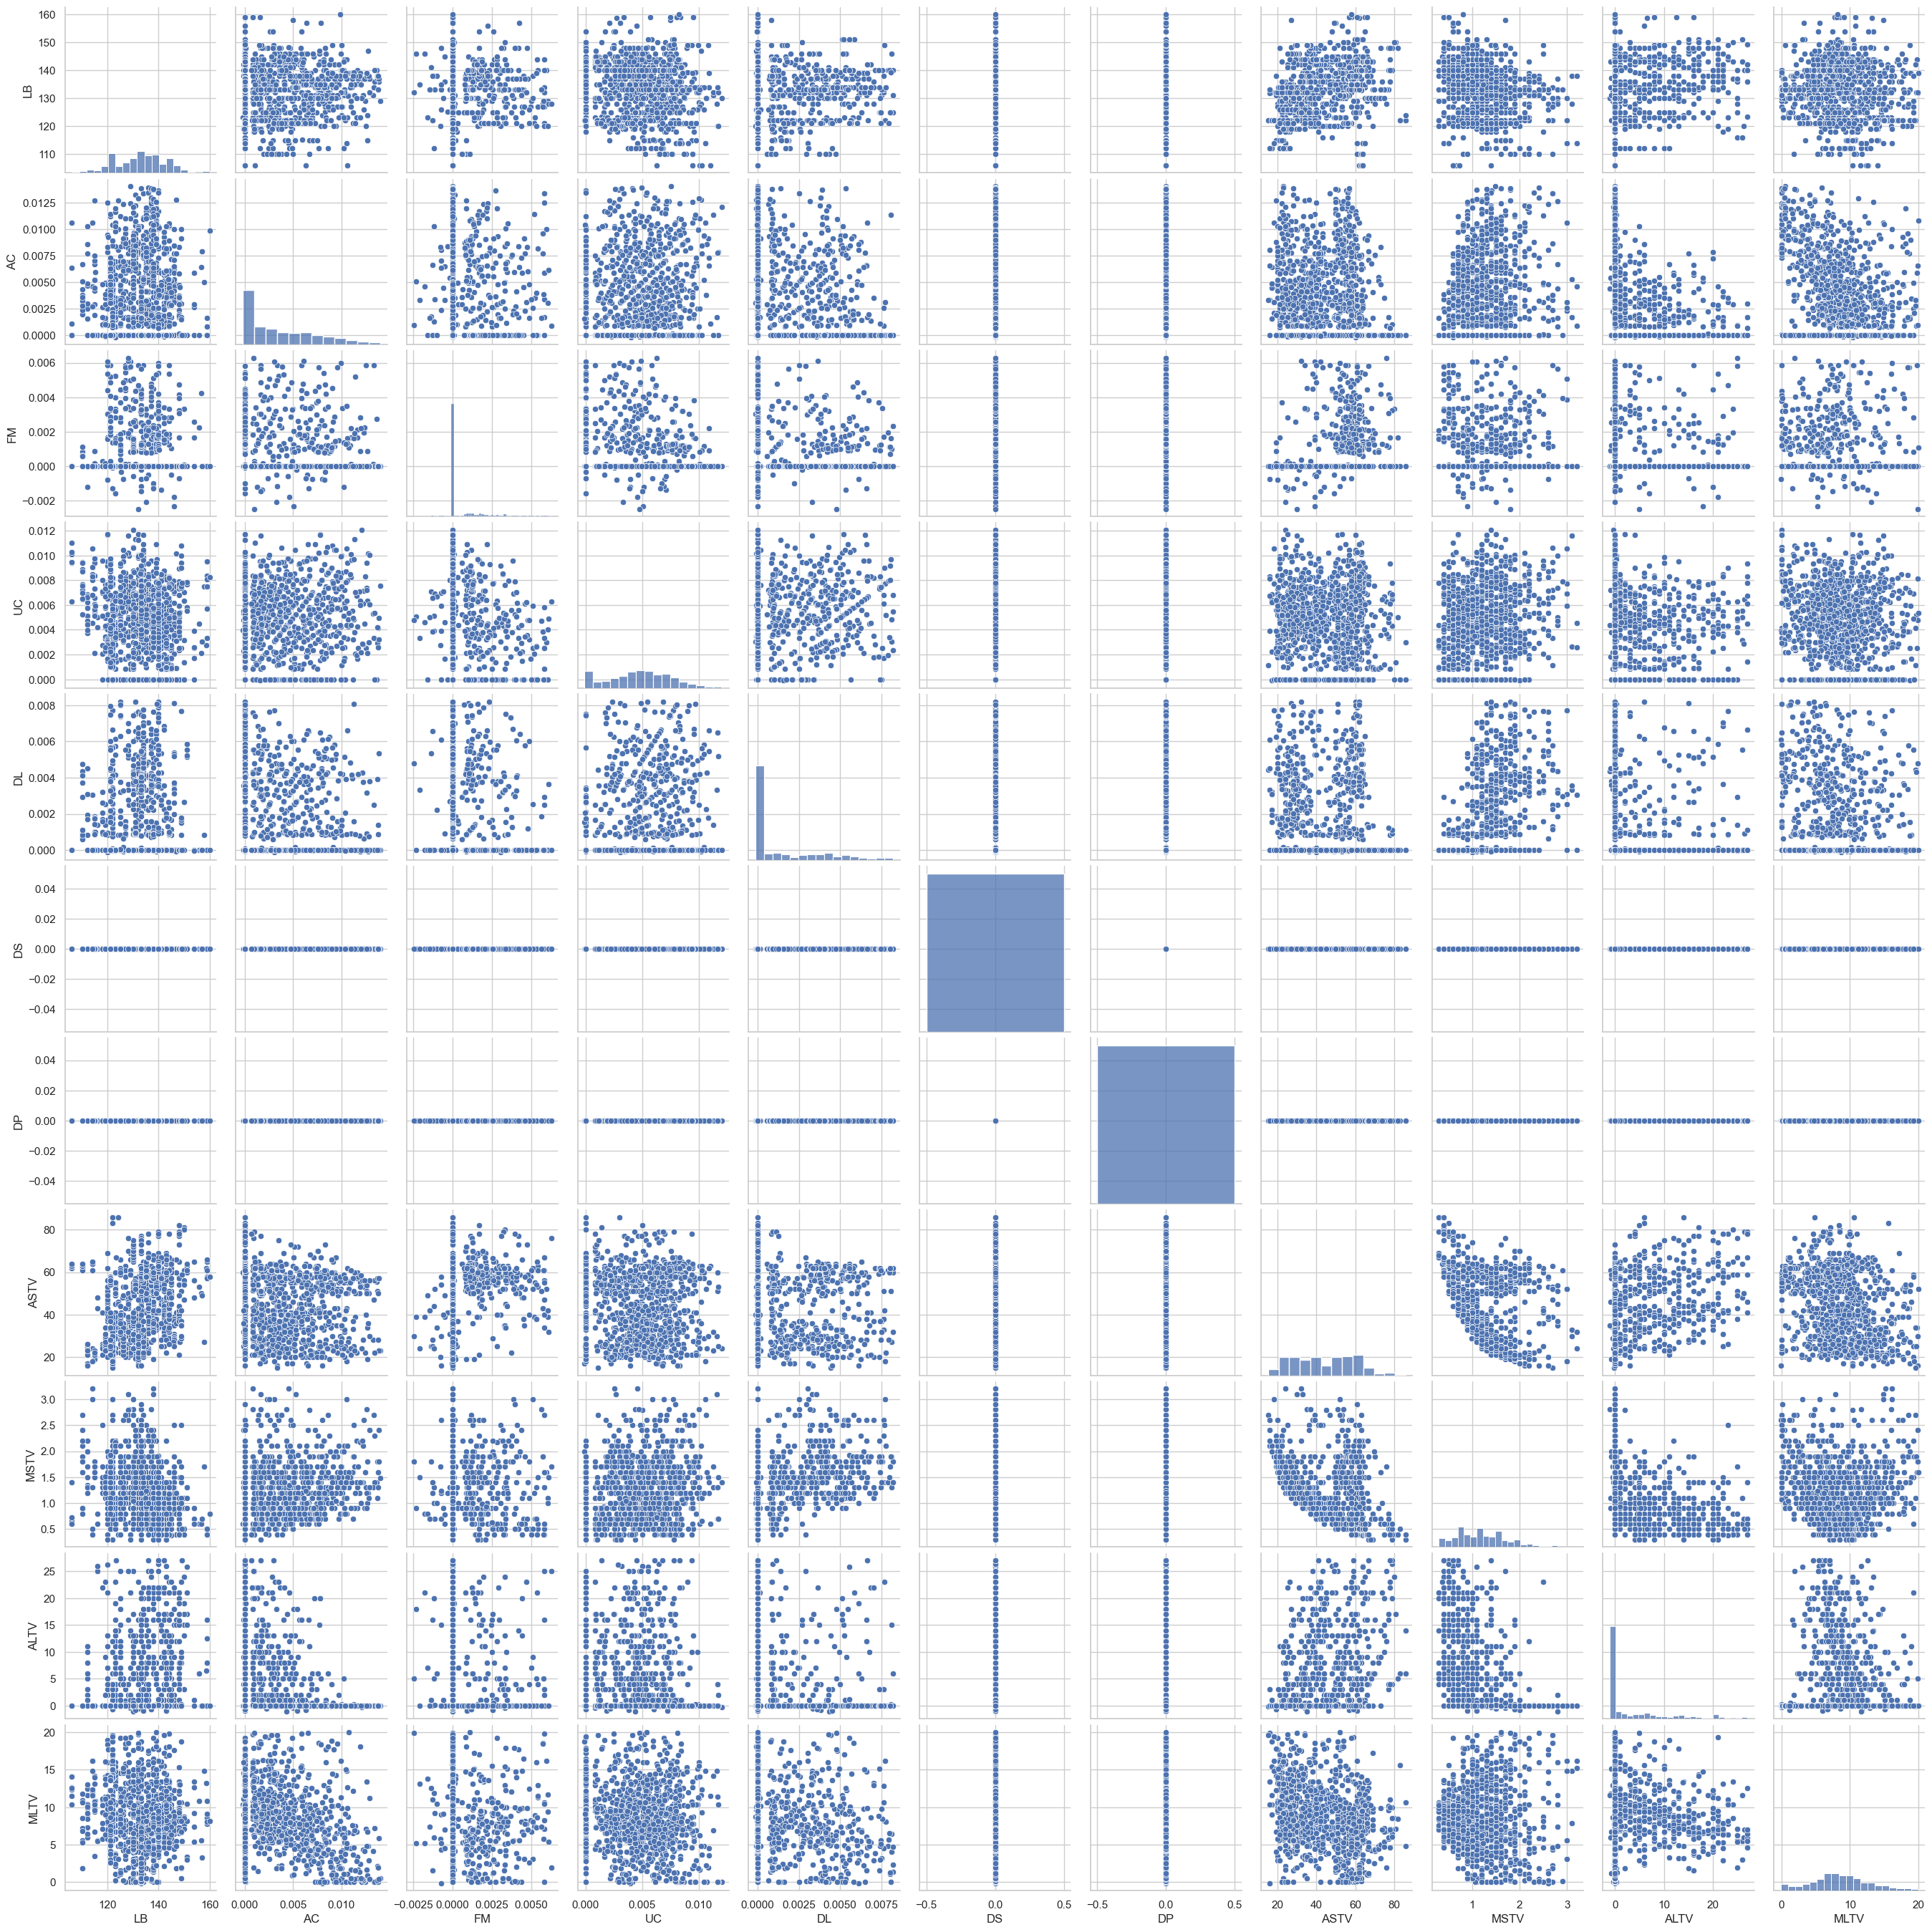

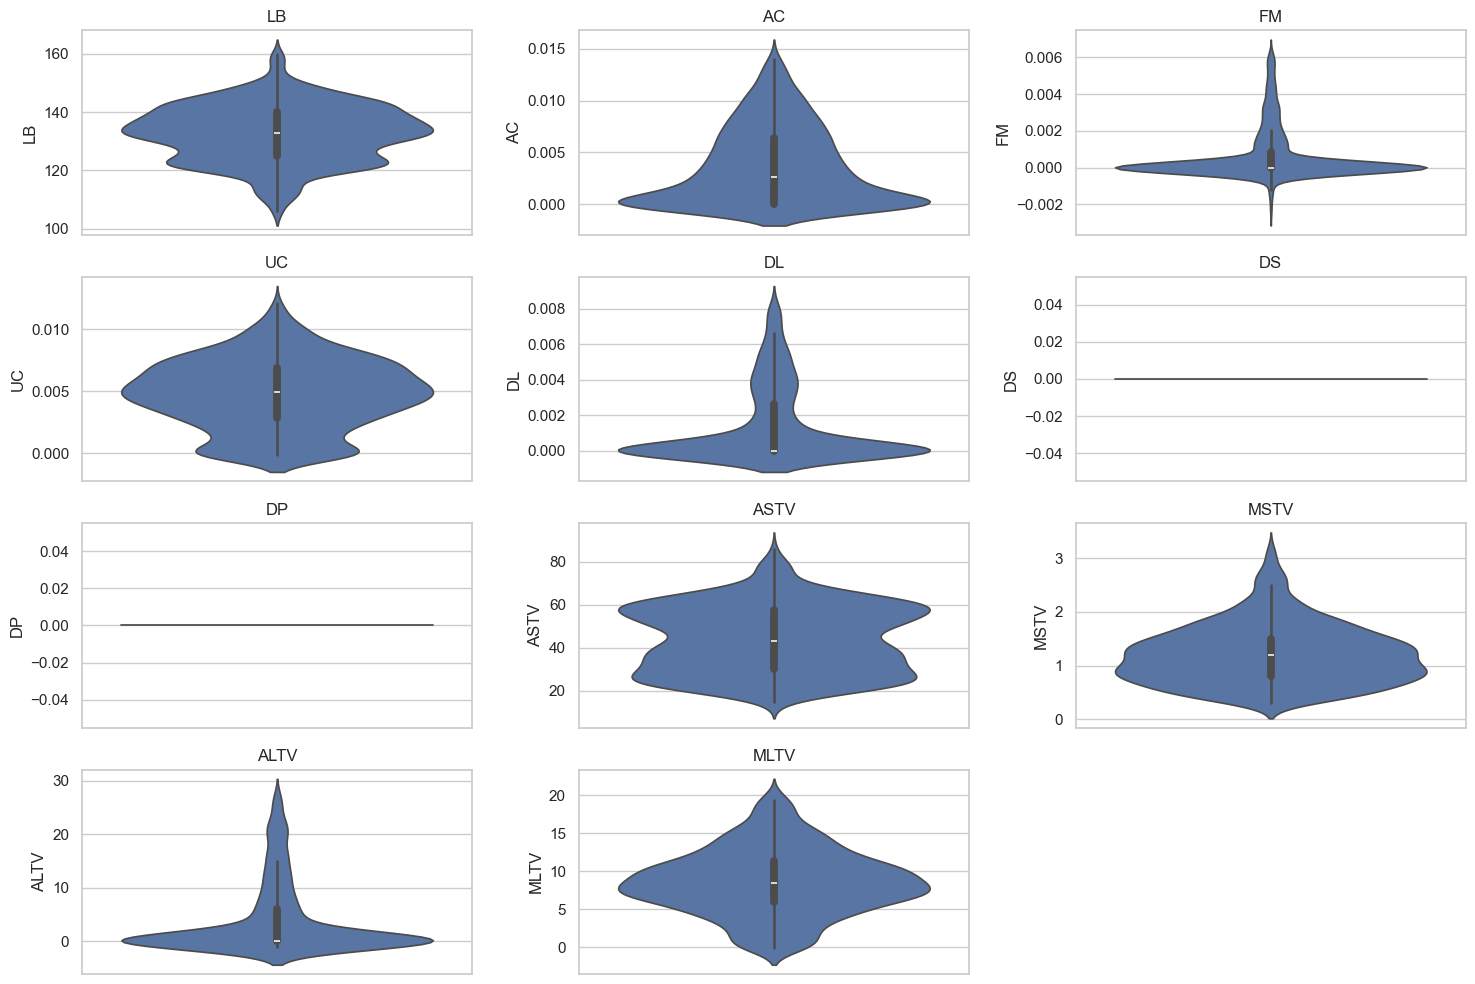

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histograms for numeric variables
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Boxplots to detect spread and outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of Numeric Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for deeper insight into relationships
sns.pairplot(df[numeric_cols])
plt.show()

# Violin plots for features with potential skew
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,3,i+1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


4. Pattern Recognition and Insights

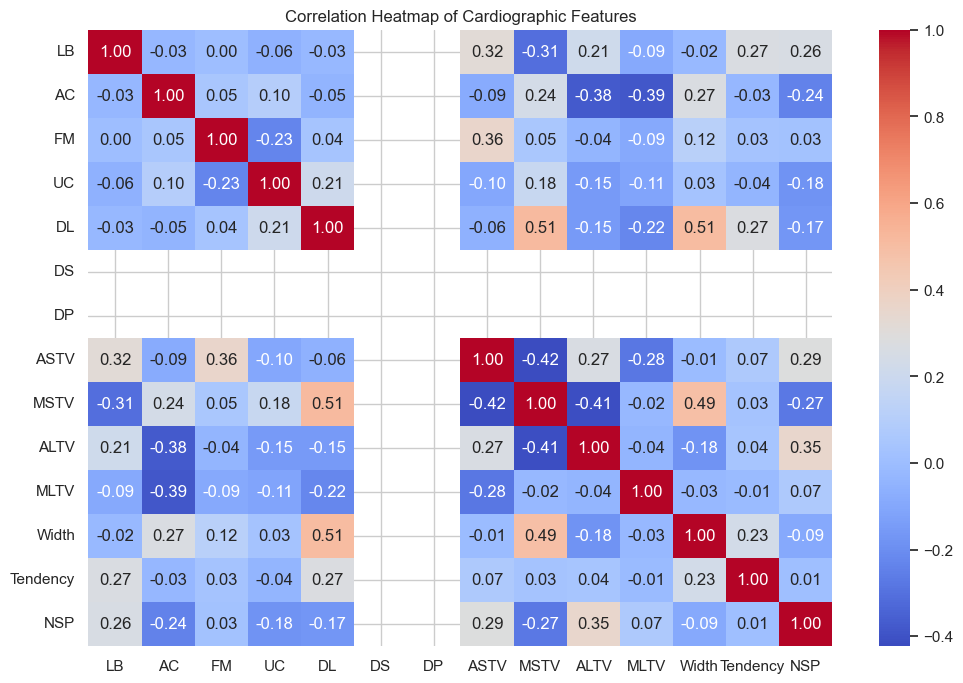

Highly correlated feature pairs:
 Empty DataFrame
Columns: []
Index: []


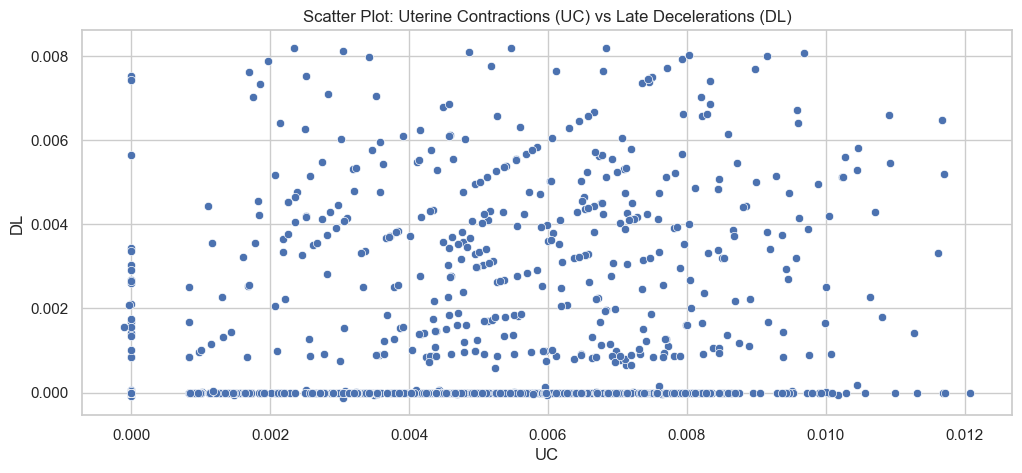

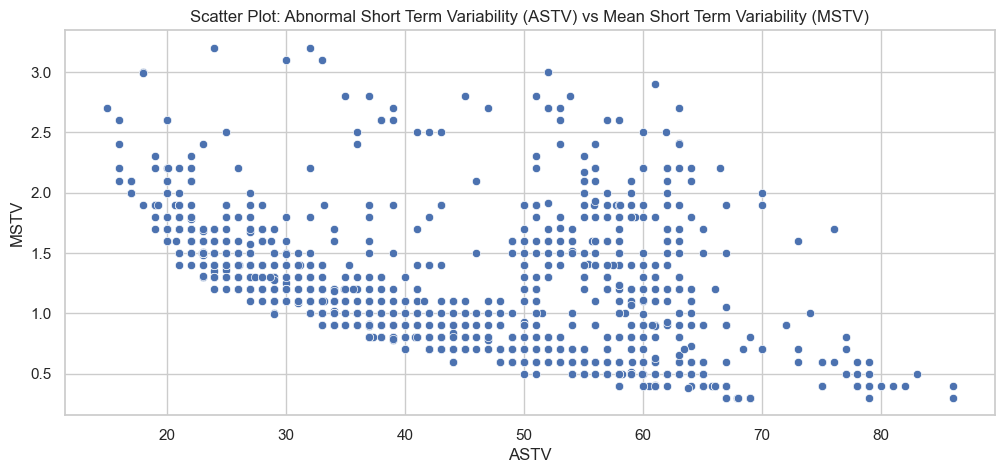

In [8]:
# Correlation Analysis
correlation_matrix = df.corr()

# Visualize correlations with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Cardiographic Features")
plt.show()

# Identify highly correlated pairs (correlation > 0.7 or < -0.7)
high_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
high_corr_filtered = high_corr.where(~np.eye(high_corr.shape[0], dtype=bool))
print("Highly correlated feature pairs:\n", high_corr_filtered.dropna(how='all').dropna(axis=1, how='all'))

# Scatter plots for interesting pairs
plt.figure(figsize=(12,5))
sns.scatterplot(x='UC', y='DL', data=df)
plt.title("Scatter Plot: Uterine Contractions (UC) vs Late Decelerations (DL)")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='ASTV', y='MSTV', data=df)
plt.title("Scatter Plot: Abnormal Short Term Variability (ASTV) vs Mean Short Term Variability (MSTV)")
plt.show()




5. Conclusion / Insights

Variables like UC and DL may have strong clinical significance.

High variability in ASTV and ALTV might indicate fetal distress.

Outliers could represent extreme clinical conditions; consider further investigation rather than removal.

Correlation patterns can help identify predictive features for fetal health classification models.